In [1]:
import os
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import torch.optim as optimizers
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets
import torchvision.transforms as transforms 
import seaborn as sns 
from callback import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
class BiRNN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__() 
        self.l1 = nn.LSTM(1463, hidden_dim, batch_first=True, bidirectional=True)
        self.l2 = nn.Linear(hidden_dim*2, 2) 

        nn.init.xavier_normal_(self.l1.weight_ih_l0) 
        nn.init.orthogonal_(self.l1.weight_hh_l0)
        nn.init.xavier_normal_(self.l2.weight) 

    def forward(self, x):
        h, _ = self.l1(x) 
        y = self.l2(h) 
        return y

In [3]:
def clean(df):
    #共通で不要
    col = ['start(exchange)[ms]', 'end(system)[ms]', 'end(exchange)[ms]',\
    'kinectstart(exchange)[ms]', 'kinectend(system)[ms]',\
    'kinectend(exchange)[ms]', 'SS_ternary', 'TC_ternary', 'TS_ternary', 'SS',\
    'TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TS1', 'TS2', 'TS3', 'TS4', 'TS5',
    ]

    res = []
    
    for data in df:
        res.append(data.drop(col, axis=1).values.tolist())

    return res

In [4]:
def louocv(files, testfile):

    train_df = []
    test_df = []


    for file in files:
        if file == testfile:
            test_df.append(pd.read_csv(file))
        else:
            train_df.append(pd.read_csv(file))

    return train_df, test_df

In [5]:
def make_target(df):
    res = [] 

    for data in df:
        tmp = data.loc[:, 'TS1':'TS5'].sum(axis=1) > 20
        res.append(tmp.astype('int'))
    return res

In [6]:
def make_scaler(datas):
    scaler = StandardScaler() 
    res = []
    for data in datas:
        res.append(data[0])
    res = np.array(res)
    scaler.fit(res)
    return scaler 

In [7]:
def standardize(datas, scaler):
    res = []
    for data in datas:
        res.append(scaler.transform(data).tolist())
    return res

1人目
epoch: 1, loss: 0.578, acc: 0.705, val_loss: 0.556, val_acc: 0.730
epoch: 2, loss: 0.434, acc: 0.818, val_loss: 0.543, val_acc: 0.702
epoch: 3, loss: 0.352, acc: 0.849, val_loss: 0.539, val_acc: 0.716
epoch: 4, loss: 0.287, acc: 0.891, val_loss: 0.533, val_acc: 0.720
epoch: 5, loss: 0.234, acc: 0.916, val_loss: 0.535, val_acc: 0.746
epoch: 6, loss: 0.19, acc: 0.945, val_loss: 0.583, val_acc: 0.737
epoch: 7, loss: 0.164, acc: 0.959, val_loss: 0.686, val_acc: 0.742
epoch: 8, loss: 0.153, acc: 0.955, val_loss: 0.837, val_acc: 0.738
epoch: 9, loss: 0.177, acc: 0.944, val_loss: 0.723, val_acc: 0.743
epoch: 10, loss: 0.232, acc: 0.894, val_loss: 0.677, val_acc: 0.717
early stopping


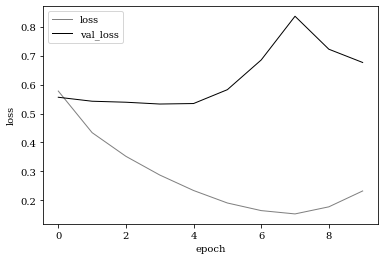

test_loss: 0.980, test_acc: 0.649
2人目
epoch: 1, loss: 0.577, acc: 0.704, val_loss: 0.496, val_acc: 0.738
epoch: 2, loss: 0.454, acc: 0.793, val_loss: 0.503, val_acc: 0.766
epoch: 3, loss: 0.401, acc: 0.830, val_loss: 0.496, val_acc: 0.775
epoch: 4, loss: 0.344, acc: 0.867, val_loss: 0.487, val_acc: 0.775
epoch: 5, loss: 0.282, acc: 0.903, val_loss: 0.492, val_acc: 0.753
epoch: 6, loss: 0.225, acc: 0.928, val_loss: 0.512, val_acc: 0.740
epoch: 7, loss: 0.18, acc: 0.949, val_loss: 0.545, val_acc: 0.722
epoch: 8, loss: 0.144, acc: 0.968, val_loss: 0.565, val_acc: 0.726
epoch: 9, loss: 0.136, acc: 0.967, val_loss: 0.602, val_acc: 0.695
epoch: 10, loss: 0.139, acc: 0.958, val_loss: 0.581, val_acc: 0.760
early stopping


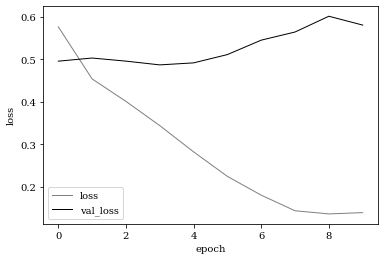

test_loss: 0.583, test_acc: 0.727
3人目
epoch: 1, loss: 0.644, acc: 0.683, val_loss: 0.566, val_acc: 0.721
epoch: 2, loss: 0.459, acc: 0.794, val_loss: 0.545, val_acc: 0.741
epoch: 3, loss: 0.383, acc: 0.839, val_loss: 0.532, val_acc: 0.753
epoch: 4, loss: 0.321, acc: 0.878, val_loss: 0.537, val_acc: 0.747
epoch: 5, loss: 0.265, acc: 0.912, val_loss: 0.542, val_acc: 0.738
epoch: 6, loss: 0.213, acc: 0.939, val_loss: 0.551, val_acc: 0.744
epoch: 7, loss: 0.169, acc: 0.963, val_loss: 0.563, val_acc: 0.733
epoch: 8, loss: 0.136, acc: 0.974, val_loss: 0.56, val_acc: 0.727
epoch: 9, loss: 0.113, acc: 0.983, val_loss: 0.607, val_acc: 0.732
early stopping


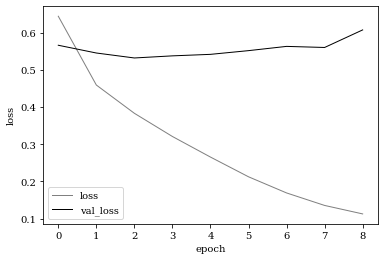

test_loss: 0.552, test_acc: 0.750
4人目
epoch: 1, loss: 0.587, acc: 0.716, val_loss: 0.559, val_acc: 0.709
epoch: 2, loss: 0.41, acc: 0.812, val_loss: 0.539, val_acc: 0.734
epoch: 3, loss: 0.337, acc: 0.861, val_loss: 0.55, val_acc: 0.733
epoch: 4, loss: 0.271, acc: 0.906, val_loss: 0.555, val_acc: 0.731
epoch: 5, loss: 0.214, acc: 0.941, val_loss: 0.574, val_acc: 0.729
epoch: 6, loss: 0.168, acc: 0.963, val_loss: 0.62, val_acc: 0.727
epoch: 7, loss: 0.148, acc: 0.963, val_loss: 0.557, val_acc: 0.743
epoch: 8, loss: 0.145, acc: 0.955, val_loss: 0.643, val_acc: 0.744
early stopping


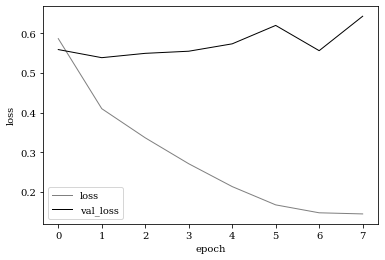

test_loss: 0.317, test_acc: 0.841
5人目
epoch: 1, loss: 0.599, acc: 0.672, val_loss: 0.591, val_acc: 0.690
epoch: 2, loss: 0.419, acc: 0.809, val_loss: 0.575, val_acc: 0.719
epoch: 3, loss: 0.347, acc: 0.862, val_loss: 0.58, val_acc: 0.717
epoch: 4, loss: 0.294, acc: 0.896, val_loss: 0.565, val_acc: 0.724
epoch: 5, loss: 0.244, acc: 0.917, val_loss: 0.601, val_acc: 0.730
epoch: 6, loss: 0.221, acc: 0.927, val_loss: 0.773, val_acc: 0.692
epoch: 7, loss: 0.234, acc: 0.918, val_loss: 0.64, val_acc: 0.705
epoch: 8, loss: 0.217, acc: 0.911, val_loss: 0.729, val_acc: 0.660
epoch: 9, loss: 0.176, acc: 0.939, val_loss: 0.666, val_acc: 0.676
epoch: 10, loss: 0.164, acc: 0.952, val_loss: 0.668, val_acc: 0.734
early stopping


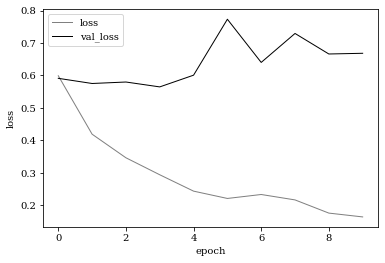

test_loss: 0.687, test_acc: 0.708
6人目
epoch: 1, loss: 0.582, acc: 0.707, val_loss: 0.524, val_acc: 0.737
epoch: 2, loss: 0.427, acc: 0.807, val_loss: 0.5, val_acc: 0.741
epoch: 3, loss: 0.354, acc: 0.867, val_loss: 0.512, val_acc: 0.737
epoch: 4, loss: 0.284, acc: 0.899, val_loss: 0.529, val_acc: 0.735
epoch: 5, loss: 0.22, acc: 0.934, val_loss: 0.562, val_acc: 0.732
epoch: 6, loss: 0.166, acc: 0.961, val_loss: 0.584, val_acc: 0.713
epoch: 7, loss: 0.14, acc: 0.967, val_loss: 0.567, val_acc: 0.713
epoch: 8, loss: 0.123, acc: 0.978, val_loss: 0.734, val_acc: 0.749
early stopping


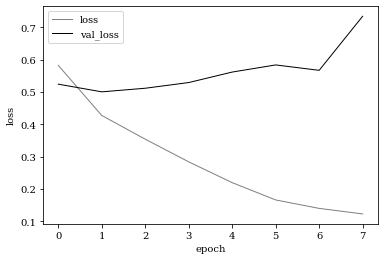

test_loss: 0.608, test_acc: 0.779
7人目
epoch: 1, loss: 0.582, acc: 0.690, val_loss: 0.532, val_acc: 0.732
epoch: 2, loss: 0.455, acc: 0.784, val_loss: 0.54, val_acc: 0.720
epoch: 3, loss: 0.396, acc: 0.829, val_loss: 0.488, val_acc: 0.760
epoch: 4, loss: 0.323, acc: 0.873, val_loss: 0.479, val_acc: 0.770
epoch: 5, loss: 0.257, acc: 0.917, val_loss: 0.473, val_acc: 0.774
epoch: 6, loss: 0.207, acc: 0.943, val_loss: 0.488, val_acc: 0.775
epoch: 7, loss: 0.162, acc: 0.966, val_loss: 0.534, val_acc: 0.743
epoch: 8, loss: 0.134, acc: 0.974, val_loss: 0.525, val_acc: 0.762
epoch: 9, loss: 0.111, acc: 0.982, val_loss: 0.556, val_acc: 0.732
epoch: 10, loss: 0.123, acc: 0.966, val_loss: 0.546, val_acc: 0.731
epoch: 11, loss: 0.0965, acc: 0.982, val_loss: 0.778, val_acc: 0.663
early stopping


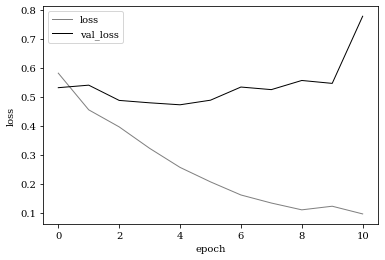

test_loss: 0.765, test_acc: 0.750
8人目
epoch: 1, loss: 0.622, acc: 0.684, val_loss: 0.548, val_acc: 0.726
epoch: 2, loss: 0.467, acc: 0.771, val_loss: 0.543, val_acc: 0.732
epoch: 3, loss: 0.386, acc: 0.831, val_loss: 0.547, val_acc: 0.742
epoch: 4, loss: 0.319, acc: 0.871, val_loss: 0.543, val_acc: 0.744
epoch: 5, loss: 0.262, acc: 0.909, val_loss: 0.553, val_acc: 0.742
epoch: 6, loss: 0.208, acc: 0.942, val_loss: 0.561, val_acc: 0.740
epoch: 7, loss: 0.165, acc: 0.963, val_loss: 0.583, val_acc: 0.730
epoch: 8, loss: 0.136, acc: 0.973, val_loss: 0.615, val_acc: 0.721
epoch: 9, loss: 0.118, acc: 0.973, val_loss: 0.696, val_acc: 0.734
epoch: 10, loss: 0.12, acc: 0.965, val_loss: 0.891, val_acc: 0.723
early stopping


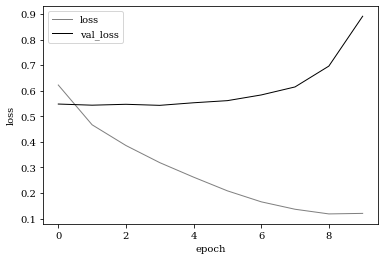

test_loss: 0.573, test_acc: 0.827
9人目
epoch: 1, loss: 0.571, acc: 0.692, val_loss: 0.535, val_acc: 0.752
epoch: 2, loss: 0.424, acc: 0.824, val_loss: 0.532, val_acc: 0.739
epoch: 3, loss: 0.35, acc: 0.855, val_loss: 0.526, val_acc: 0.757
epoch: 4, loss: 0.286, acc: 0.897, val_loss: 0.547, val_acc: 0.749
epoch: 5, loss: 0.228, acc: 0.923, val_loss: 0.526, val_acc: 0.757
epoch: 6, loss: 0.194, acc: 0.938, val_loss: 0.597, val_acc: 0.718
epoch: 7, loss: 0.161, acc: 0.957, val_loss: 0.546, val_acc: 0.781
epoch: 8, loss: 0.132, acc: 0.967, val_loss: 0.539, val_acc: 0.773
epoch: 9, loss: 0.105, acc: 0.981, val_loss: 0.604, val_acc: 0.783
early stopping


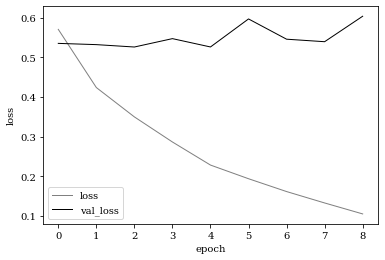

test_loss: 0.671, test_acc: 0.733
10人目
epoch: 1, loss: 0.587, acc: 0.707, val_loss: 0.571, val_acc: 0.718
epoch: 2, loss: 0.465, acc: 0.785, val_loss: 0.529, val_acc: 0.719
epoch: 3, loss: 0.374, acc: 0.852, val_loss: 0.539, val_acc: 0.719
epoch: 4, loss: 0.311, acc: 0.881, val_loss: 0.538, val_acc: 0.722
epoch: 5, loss: 0.252, acc: 0.912, val_loss: 0.548, val_acc: 0.711
epoch: 6, loss: 0.198, acc: 0.948, val_loss: 0.559, val_acc: 0.706
epoch: 7, loss: 0.15, acc: 0.974, val_loss: 0.575, val_acc: 0.710
epoch: 8, loss: 0.117, acc: 0.983, val_loss: 0.6, val_acc: 0.721
early stopping


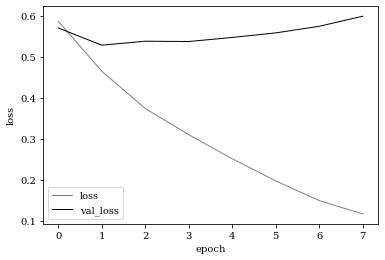

test_loss: 0.527, test_acc: 0.696
11人目
epoch: 1, loss: 0.572, acc: 0.711, val_loss: 0.58, val_acc: 0.727
epoch: 2, loss: 0.416, acc: 0.820, val_loss: 0.579, val_acc: 0.720
epoch: 3, loss: 0.351, acc: 0.864, val_loss: 0.563, val_acc: 0.745
epoch: 4, loss: 0.289, acc: 0.895, val_loss: 0.565, val_acc: 0.749
epoch: 5, loss: 0.227, acc: 0.928, val_loss: 0.569, val_acc: 0.742
epoch: 6, loss: 0.178, acc: 0.949, val_loss: 0.597, val_acc: 0.739
epoch: 7, loss: 0.15, acc: 0.968, val_loss: 0.606, val_acc: 0.724
epoch: 8, loss: 0.144, acc: 0.959, val_loss: 0.699, val_acc: 0.696
epoch: 9, loss: 0.184, acc: 0.932, val_loss: 0.679, val_acc: 0.716
early stopping


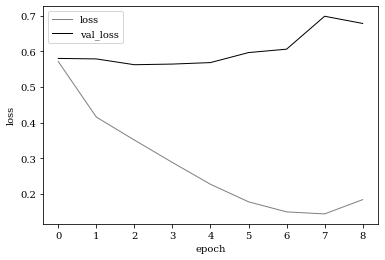

test_loss: 0.705, test_acc: 0.711
12人目
epoch: 1, loss: 0.57, acc: 0.689, val_loss: 0.574, val_acc: 0.732
epoch: 2, loss: 0.394, acc: 0.833, val_loss: 0.568, val_acc: 0.733
epoch: 3, loss: 0.32, acc: 0.870, val_loss: 0.572, val_acc: 0.722
epoch: 4, loss: 0.261, acc: 0.904, val_loss: 0.571, val_acc: 0.733
epoch: 5, loss: 0.214, acc: 0.930, val_loss: 0.612, val_acc: 0.700
epoch: 6, loss: 0.18, acc: 0.945, val_loss: 0.646, val_acc: 0.718
epoch: 7, loss: 0.186, acc: 0.929, val_loss: 0.639, val_acc: 0.721
epoch: 8, loss: 0.164, acc: 0.944, val_loss: 0.665, val_acc: 0.724
early stopping


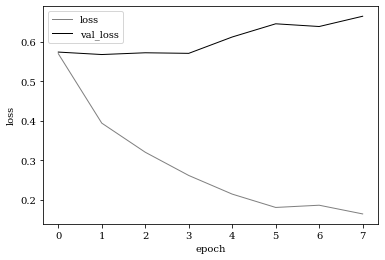

test_loss: 0.657, test_acc: 0.708
13人目
epoch: 1, loss: 0.629, acc: 0.669, val_loss: 0.498, val_acc: 0.759
epoch: 2, loss: 0.449, acc: 0.800, val_loss: 0.486, val_acc: 0.753
epoch: 3, loss: 0.381, acc: 0.844, val_loss: 0.479, val_acc: 0.759
epoch: 4, loss: 0.326, acc: 0.884, val_loss: 0.482, val_acc: 0.764
epoch: 5, loss: 0.278, acc: 0.903, val_loss: 0.502, val_acc: 0.765
epoch: 6, loss: 0.235, acc: 0.927, val_loss: 0.489, val_acc: 0.767
epoch: 7, loss: 0.195, acc: 0.954, val_loss: 0.479, val_acc: 0.761
epoch: 8, loss: 0.171, acc: 0.953, val_loss: 0.567, val_acc: 0.739
epoch: 9, loss: 0.175, acc: 0.948, val_loss: 0.764, val_acc: 0.637
epoch: 10, loss: 0.209, acc: 0.922, val_loss: 0.604, val_acc: 0.705
epoch: 11, loss: 0.171, acc: 0.943, val_loss: 0.578, val_acc: 0.761
epoch: 12, loss: 0.153, acc: 0.949, val_loss: 0.679, val_acc: 0.748
epoch: 13, loss: 0.145, acc: 0.951, val_loss: 0.546, val_acc: 0.767
early stopping


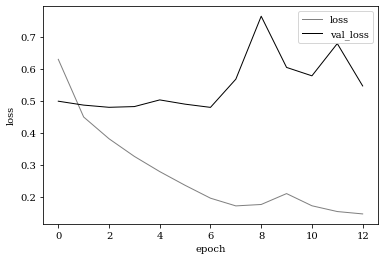

test_loss: 0.415, test_acc: 0.806
14人目
epoch: 1, loss: 0.57, acc: 0.704, val_loss: 0.556, val_acc: 0.724
epoch: 2, loss: 0.438, acc: 0.806, val_loss: 0.54, val_acc: 0.729
epoch: 3, loss: 0.376, acc: 0.852, val_loss: 0.546, val_acc: 0.746
epoch: 4, loss: 0.319, acc: 0.878, val_loss: 0.529, val_acc: 0.749
epoch: 5, loss: 0.273, acc: 0.899, val_loss: 0.545, val_acc: 0.740
epoch: 6, loss: 0.226, acc: 0.926, val_loss: 0.637, val_acc: 0.695
epoch: 7, loss: 0.189, acc: 0.940, val_loss: 0.665, val_acc: 0.692
epoch: 8, loss: 0.169, acc: 0.945, val_loss: 0.564, val_acc: 0.744
epoch: 9, loss: 0.14, acc: 0.959, val_loss: 0.597, val_acc: 0.748
epoch: 10, loss: 0.121, acc: 0.973, val_loss: 0.607, val_acc: 0.755
early stopping


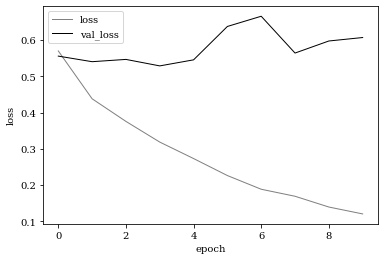

test_loss: 0.824, test_acc: 0.662
15人目
epoch: 1, loss: 0.553, acc: 0.716, val_loss: 0.614, val_acc: 0.679
epoch: 2, loss: 0.396, acc: 0.824, val_loss: 0.617, val_acc: 0.663
epoch: 3, loss: 0.324, acc: 0.864, val_loss: 0.622, val_acc: 0.661
epoch: 4, loss: 0.261, acc: 0.904, val_loss: 0.625, val_acc: 0.666
epoch: 5, loss: 0.205, acc: 0.944, val_loss: 0.643, val_acc: 0.672
epoch: 6, loss: 0.163, acc: 0.963, val_loss: 0.691, val_acc: 0.676
epoch: 7, loss: 0.132, acc: 0.972, val_loss: 0.791, val_acc: 0.674
early stopping


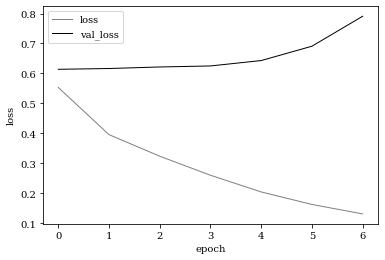

test_loss: 0.954, test_acc: 0.663
16人目
epoch: 1, loss: 0.617, acc: 0.688, val_loss: 0.555, val_acc: 0.723
epoch: 2, loss: 0.43, acc: 0.806, val_loss: 0.542, val_acc: 0.716
epoch: 3, loss: 0.374, acc: 0.843, val_loss: 0.54, val_acc: 0.721
epoch: 4, loss: 0.313, acc: 0.880, val_loss: 0.547, val_acc: 0.727
epoch: 5, loss: 0.258, acc: 0.912, val_loss: 0.575, val_acc: 0.726
epoch: 6, loss: 0.213, acc: 0.943, val_loss: 0.63, val_acc: 0.720
epoch: 7, loss: 0.185, acc: 0.951, val_loss: 0.672, val_acc: 0.704
epoch: 8, loss: 0.161, acc: 0.963, val_loss: 0.695, val_acc: 0.710
epoch: 9, loss: 0.153, acc: 0.959, val_loss: 0.642, val_acc: 0.730
early stopping


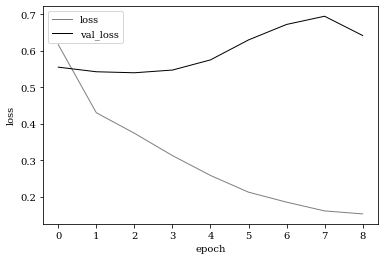

test_loss: 0.256, test_acc: 0.912
17人目
epoch: 1, loss: 0.576, acc: 0.700, val_loss: 0.518, val_acc: 0.757
epoch: 2, loss: 0.425, acc: 0.813, val_loss: 0.508, val_acc: 0.759
epoch: 3, loss: 0.365, acc: 0.841, val_loss: 0.557, val_acc: 0.764
epoch: 4, loss: 0.326, acc: 0.869, val_loss: 0.573, val_acc: 0.764
epoch: 5, loss: 0.293, acc: 0.892, val_loss: 0.509, val_acc: 0.760
epoch: 6, loss: 0.234, acc: 0.916, val_loss: 0.539, val_acc: 0.743
epoch: 7, loss: 0.192, acc: 0.941, val_loss: 0.555, val_acc: 0.749
epoch: 8, loss: 0.168, acc: 0.949, val_loss: 0.578, val_acc: 0.766
early stopping


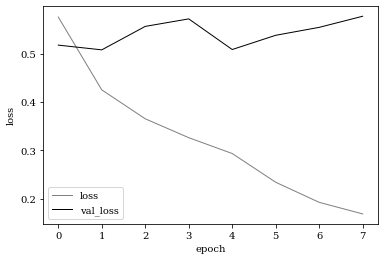

test_loss: 0.940, test_acc: 0.577
18人目
epoch: 1, loss: 0.573, acc: 0.697, val_loss: 0.53, val_acc: 0.714
epoch: 2, loss: 0.433, acc: 0.805, val_loss: 0.522, val_acc: 0.717
epoch: 3, loss: 0.371, acc: 0.847, val_loss: 0.535, val_acc: 0.732
epoch: 4, loss: 0.309, acc: 0.877, val_loss: 0.541, val_acc: 0.743
epoch: 5, loss: 0.249, acc: 0.918, val_loss: 0.555, val_acc: 0.735
epoch: 6, loss: 0.195, acc: 0.953, val_loss: 0.583, val_acc: 0.743
epoch: 7, loss: 0.15, acc: 0.970, val_loss: 0.572, val_acc: 0.752
epoch: 8, loss: 0.117, acc: 0.980, val_loss: 0.64, val_acc: 0.733
early stopping


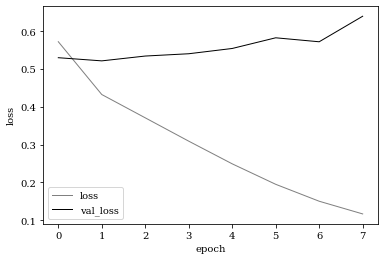

test_loss: 0.542, test_acc: 0.765
19人目
epoch: 1, loss: 0.563, acc: 0.712, val_loss: 0.564, val_acc: 0.714
epoch: 2, loss: 0.407, acc: 0.811, val_loss: 0.542, val_acc: 0.732
epoch: 3, loss: 0.328, acc: 0.867, val_loss: 0.538, val_acc: 0.739
epoch: 4, loss: 0.259, acc: 0.908, val_loss: 0.555, val_acc: 0.739
epoch: 5, loss: 0.198, acc: 0.951, val_loss: 0.57, val_acc: 0.742
epoch: 6, loss: 0.151, acc: 0.967, val_loss: 0.58, val_acc: 0.757
epoch: 7, loss: 0.119, acc: 0.984, val_loss: 0.701, val_acc: 0.740
epoch: 8, loss: 0.114, acc: 0.977, val_loss: 0.625, val_acc: 0.743
epoch: 9, loss: 0.146, acc: 0.952, val_loss: 0.709, val_acc: 0.738
early stopping


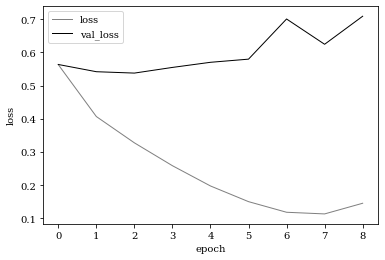

test_loss: 0.472, test_acc: 0.841
20人目
epoch: 1, loss: 0.583, acc: 0.699, val_loss: 0.502, val_acc: 0.753
epoch: 2, loss: 0.449, acc: 0.795, val_loss: 0.523, val_acc: 0.763
epoch: 3, loss: 0.388, acc: 0.833, val_loss: 0.538, val_acc: 0.755
epoch: 4, loss: 0.324, acc: 0.870, val_loss: 0.528, val_acc: 0.732
epoch: 5, loss: 0.264, acc: 0.906, val_loss: 0.544, val_acc: 0.716
epoch: 6, loss: 0.211, acc: 0.933, val_loss: 0.546, val_acc: 0.731
epoch: 7, loss: 0.186, acc: 0.946, val_loss: 0.542, val_acc: 0.749
early stopping


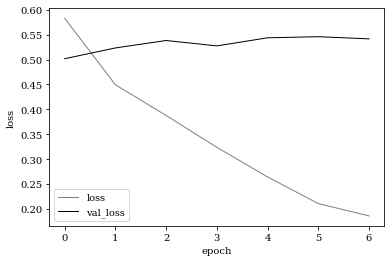

test_loss: 0.530, test_acc: 0.783
21人目
epoch: 1, loss: 0.609, acc: 0.676, val_loss: 0.516, val_acc: 0.763
epoch: 2, loss: 0.423, acc: 0.804, val_loss: 0.496, val_acc: 0.768
epoch: 3, loss: 0.353, acc: 0.856, val_loss: 0.49, val_acc: 0.760
epoch: 4, loss: 0.286, acc: 0.896, val_loss: 0.487, val_acc: 0.760
epoch: 5, loss: 0.228, acc: 0.938, val_loss: 0.489, val_acc: 0.756
epoch: 6, loss: 0.177, acc: 0.961, val_loss: 0.529, val_acc: 0.735
epoch: 7, loss: 0.137, acc: 0.973, val_loss: 0.558, val_acc: 0.726
epoch: 8, loss: 0.128, acc: 0.967, val_loss: 0.546, val_acc: 0.737
epoch: 9, loss: 0.119, acc: 0.972, val_loss: 0.728, val_acc: 0.670
epoch: 10, loss: 0.142, acc: 0.954, val_loss: 0.66, val_acc: 0.702
early stopping


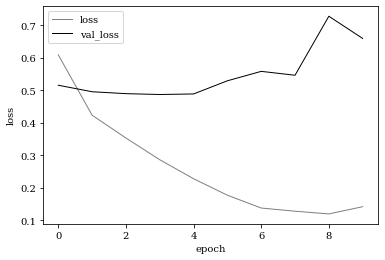

test_loss: 0.507, test_acc: 0.824
22人目
epoch: 1, loss: 0.604, acc: 0.692, val_loss: 0.512, val_acc: 0.761
epoch: 2, loss: 0.455, acc: 0.781, val_loss: 0.487, val_acc: 0.787
epoch: 3, loss: 0.399, acc: 0.832, val_loss: 0.533, val_acc: 0.743
epoch: 4, loss: 0.332, acc: 0.871, val_loss: 0.574, val_acc: 0.731
epoch: 5, loss: 0.278, acc: 0.896, val_loss: 0.58, val_acc: 0.733
epoch: 6, loss: 0.233, acc: 0.923, val_loss: 0.541, val_acc: 0.760
epoch: 7, loss: 0.214, acc: 0.924, val_loss: 0.48, val_acc: 0.779
epoch: 8, loss: 0.201, acc: 0.929, val_loss: 0.573, val_acc: 0.731
epoch: 9, loss: 0.204, acc: 0.922, val_loss: 0.602, val_acc: 0.754
epoch: 10, loss: 0.212, acc: 0.925, val_loss: 0.694, val_acc: 0.720
epoch: 11, loss: 0.15, acc: 0.960, val_loss: 0.572, val_acc: 0.779
epoch: 12, loss: 0.103, acc: 0.977, val_loss: 0.519, val_acc: 0.789
epoch: 13, loss: 0.075, acc: 0.989, val_loss: 0.577, val_acc: 0.770
early stopping


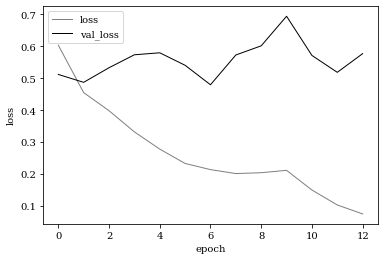

test_loss: 0.233, test_acc: 0.855
23人目
epoch: 1, loss: 0.571, acc: 0.692, val_loss: 0.543, val_acc: 0.722
epoch: 2, loss: 0.418, acc: 0.816, val_loss: 0.541, val_acc: 0.731
epoch: 3, loss: 0.36, acc: 0.848, val_loss: 0.583, val_acc: 0.718
epoch: 4, loss: 0.303, acc: 0.884, val_loss: 0.594, val_acc: 0.715
epoch: 5, loss: 0.252, acc: 0.910, val_loss: 0.605, val_acc: 0.721
epoch: 6, loss: 0.206, acc: 0.937, val_loss: 0.59, val_acc: 0.736
epoch: 7, loss: 0.162, acc: 0.964, val_loss: 0.595, val_acc: 0.740
epoch: 8, loss: 0.145, acc: 0.959, val_loss: 0.672, val_acc: 0.682
early stopping


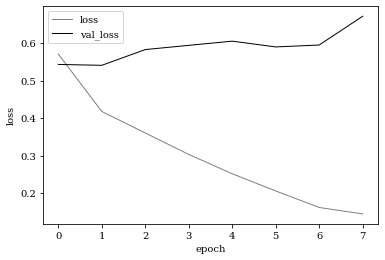

test_loss: 0.800, test_acc: 0.584
24人目
epoch: 1, loss: 0.582, acc: 0.680, val_loss: 0.488, val_acc: 0.765
epoch: 2, loss: 0.423, acc: 0.813, val_loss: 0.484, val_acc: 0.770
epoch: 3, loss: 0.381, acc: 0.837, val_loss: 0.499, val_acc: 0.766
epoch: 4, loss: 0.308, acc: 0.878, val_loss: 0.546, val_acc: 0.745
epoch: 5, loss: 0.259, acc: 0.903, val_loss: 0.6, val_acc: 0.708
epoch: 6, loss: 0.224, acc: 0.923, val_loss: 0.511, val_acc: 0.750
epoch: 7, loss: 0.192, acc: 0.940, val_loss: 0.566, val_acc: 0.747
epoch: 8, loss: 0.21, acc: 0.922, val_loss: 0.595, val_acc: 0.770
early stopping


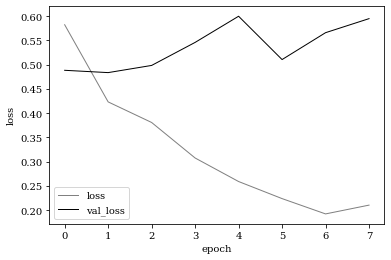

test_loss: 0.967, test_acc: 0.672
25人目
epoch: 1, loss: 0.561, acc: 0.712, val_loss: 0.557, val_acc: 0.714
epoch: 2, loss: 0.405, acc: 0.821, val_loss: 0.551, val_acc: 0.713
epoch: 3, loss: 0.337, acc: 0.866, val_loss: 0.557, val_acc: 0.715
epoch: 4, loss: 0.272, acc: 0.901, val_loss: 0.6, val_acc: 0.706
epoch: 5, loss: 0.227, acc: 0.925, val_loss: 0.631, val_acc: 0.698
epoch: 6, loss: 0.215, acc: 0.931, val_loss: 0.575, val_acc: 0.711
epoch: 7, loss: 0.233, acc: 0.910, val_loss: 0.65, val_acc: 0.736
epoch: 8, loss: 0.206, acc: 0.921, val_loss: 0.676, val_acc: 0.721
early stopping


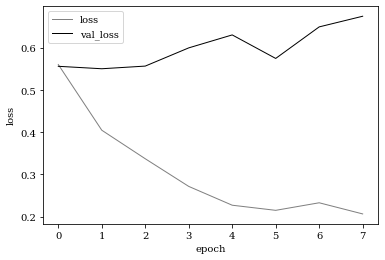

test_loss: 0.606, test_acc: 0.727
26人目
epoch: 1, loss: 0.587, acc: 0.689, val_loss: 0.541, val_acc: 0.744
epoch: 2, loss: 0.427, acc: 0.792, val_loss: 0.522, val_acc: 0.741
epoch: 3, loss: 0.35, acc: 0.851, val_loss: 0.527, val_acc: 0.749
epoch: 4, loss: 0.289, acc: 0.890, val_loss: 0.53, val_acc: 0.742
epoch: 5, loss: 0.239, acc: 0.923, val_loss: 0.585, val_acc: 0.703
epoch: 6, loss: 0.196, acc: 0.941, val_loss: 0.513, val_acc: 0.756
epoch: 7, loss: 0.207, acc: 0.929, val_loss: 0.536, val_acc: 0.743
epoch: 8, loss: 0.204, acc: 0.928, val_loss: 0.597, val_acc: 0.753
epoch: 9, loss: 0.208, acc: 0.923, val_loss: 0.646, val_acc: 0.752
epoch: 10, loss: 0.266, acc: 0.886, val_loss: 0.56, val_acc: 0.760
epoch: 11, loss: 0.235, acc: 0.900, val_loss: 0.66, val_acc: 0.705
epoch: 12, loss: 0.171, acc: 0.942, val_loss: 0.524, val_acc: 0.765
early stopping


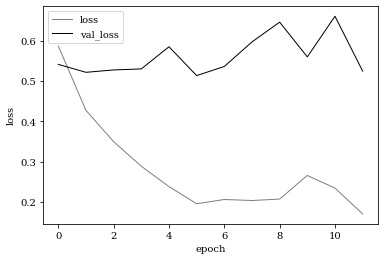

test_loss: 0.533, test_acc: 0.779
27人目
epoch: 1, loss: 0.531, acc: 0.741, val_loss: 0.595, val_acc: 0.696
epoch: 2, loss: 0.392, acc: 0.819, val_loss: 0.592, val_acc: 0.694
epoch: 3, loss: 0.317, acc: 0.867, val_loss: 0.613, val_acc: 0.665
epoch: 4, loss: 0.265, acc: 0.897, val_loss: 0.634, val_acc: 0.653
epoch: 5, loss: 0.227, acc: 0.919, val_loss: 0.608, val_acc: 0.716
epoch: 6, loss: 0.212, acc: 0.925, val_loss: 0.653, val_acc: 0.713
epoch: 7, loss: 0.212, acc: 0.923, val_loss: 0.877, val_acc: 0.718
epoch: 8, loss: 0.276, acc: 0.882, val_loss: 0.67, val_acc: 0.723
early stopping


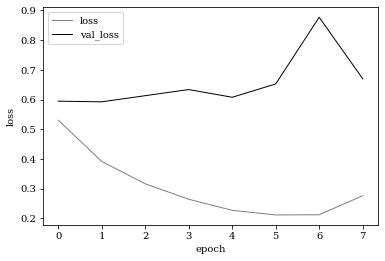

test_loss: 0.713, test_acc: 0.705
28人目
epoch: 1, loss: 0.613, acc: 0.694, val_loss: 0.551, val_acc: 0.739
epoch: 2, loss: 0.454, acc: 0.793, val_loss: 0.516, val_acc: 0.726
epoch: 3, loss: 0.371, acc: 0.847, val_loss: 0.517, val_acc: 0.733
epoch: 4, loss: 0.31, acc: 0.875, val_loss: 0.528, val_acc: 0.740
epoch: 5, loss: 0.246, acc: 0.915, val_loss: 0.563, val_acc: 0.736
epoch: 6, loss: 0.192, acc: 0.945, val_loss: 0.589, val_acc: 0.738
epoch: 7, loss: 0.148, acc: 0.970, val_loss: 0.642, val_acc: 0.731
epoch: 8, loss: 0.116, acc: 0.983, val_loss: 0.691, val_acc: 0.725
early stopping


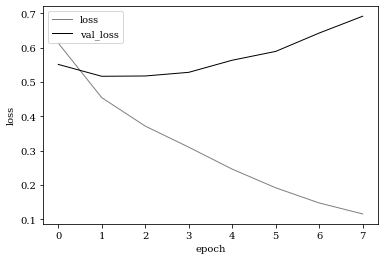

test_loss: 0.856, test_acc: 0.714


In [8]:
FILE_PATH = "/home/r-yanagimoto/Hazumi1902/dumpfiles/*.csv"
files = glob.glob(FILE_PATH)

test_preds = []
test_ans = []

i = 0

for testfile in files:
    i += 1
    print(f'{i}人目')
    train_df, test_df = louocv(files, testfile)

    train_data = clean(train_df)
    train_target = make_target(train_df)


    test_data = clean(test_df)
    test_target = make_target(test_df)
    
    x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, shuffle=True)

    scaler = make_scaler(x_train)
    x_train = standardize(x_train, scaler) 
    x_valid = standardize(x_valid, scaler) 
    test_data = standardize(test_data, scaler)

    model = BiRNN(50) 


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), amsgrad=True)

    def compute_loss(t, y):
        return criterion(y, t)

    def train_step(x, t):
        model.train()
        preds = model(x)
        loss = compute_loss(t, preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        return loss, preds

    def val_step(x, t):
        model.eval()
        preds = model(x)
        loss = criterion(preds, t)

        return loss, preds

    # エポック数
    epochs = 200
    hist = {'loss': [], 'accuracy': [],
            'val_loss': [], 'val_accuracy': []}
    es = EarlyStopping(patience=5, verbose=1)

    for epoch in range(epochs):
        train_loss = 0. 
        train_acc = 0. 
        val_loss = 0. 
        val_acc = 0. 

        for (x, t) in zip(x_train, y_train):
            x = torch.tensor(x)
            t = torch.tensor(t)
            loss, preds = train_step(x, t) 
            train_loss += loss.item() 
            train_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        train_loss /= len(x_train) 
        train_acc /= len(x_train) 

        for (x, t) in zip(x_valid, y_valid):
            x = torch.tensor(x) 
            t = torch.tensor(t)
            loss, preds = val_step(x, t) 
            val_loss += loss.item() 
            val_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        val_loss /= len(x_valid) 
        val_acc /= len(x_valid)

        hist['loss'].append(train_loss) 
        hist['accuracy'].append(train_acc) 
        hist['val_loss'].append(val_loss) 
        hist['val_accuracy'].append(val_acc) 

        print('epoch: {}, loss: {:.3}, acc: {:.3f}, val_loss: {:.3}, val_acc: {:.3f}'.format(epoch+1, train_loss, train_acc, val_loss, val_acc))

        if es(val_loss):
            break
    
    # モデルの評価
    loss = hist['loss'] 
    val_loss = hist['val_loss'] 

    fig = plt.figure() 
    plt.rc('font', family='serif') 
    plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss') 
    plt.plot(range(len(val_loss)), val_loss, color='black', linewidth=1, label='val_loss') 
    plt.xlabel('epoch') 
    plt.ylabel('loss') 
    plt.legend() 
    plt.show() 

    # テストデータの評価
    def test_step(x, t):
        return val_step(x, t) 

    test_loss = 0.
    test_acc = 0. 

    for (x, t) in zip(test_data, test_target):
        x = torch.tensor(x) 
        t = torch.tensor(t)
        loss, preds = test_step(x, t) 
        test_loss += loss.item() 
        test_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 
    
    print('test_loss: {:.3f}, test_acc: {:.3f}'.format(test_loss, test_acc))

    test_ans = test_ans + test_target[0].values.tolist()
    test_preds = test_preds + torch.argmax(preds, dim=1).tolist()

In [12]:
print(classification_report(test_ans, test_preds))

              precision    recall  f1-score   support

           0       0.65      0.53      0.59       816
           1       0.77      0.85      0.81      1521

    accuracy                           0.74      2337
   macro avg       0.71      0.69      0.70      2337
weighted avg       0.73      0.74      0.73      2337



In [13]:
print(accuracy_score(test_ans, test_preds))

0.7372700042789901


[[ 433  383]
 [ 231 1290]]


<AxesSubplot:>

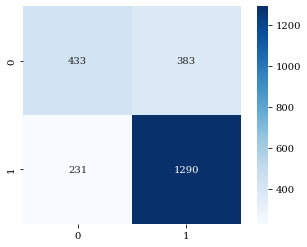

In [14]:
cm = confusion_matrix(test_ans, test_preds)
print(cm)

sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='d')